**Importing Python Libraries**

In [ ]:
import numpy as np
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
import random as rn
import math

**Data Importing**

In [ ]:
df = pd.read_csv('DST0.csv')
df.head()

,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),A,SOC,SOC%
0,0.000000,4.154059,0.000000e+00,0.0,0.0,1.0,100.0
1,0.999353,4.247043,7.054610e-10,0.0,0.0,1.0,100.0
2,0.339846,4.199741,9.933060e-04,0.0,0.0,1.0,100.0
3,0.317353,4.199903,1.905517e-03,0.0,0.0,1.0,100.0
4,0.300798,4.199903,2.764220e-03,0.0,0.0,1.0,100.0


In [ ]:
X =df.drop(['Charge_Capacity(Ah)','Discharge_Capacity(Ah)', 'A', 'SOC', 'SOC%'], axis=1)
X = X.dropna()
print(X)

      Current(A)  Voltage(V)
0       0.000000    4.154059
1       0.999353    4.247043
2       0.339846    4.199741
3       0.317353    4.199903
4       0.300798    4.199903
...          ...         ...
7195   -0.000074    3.577693
7196   -0.000254    3.577855
7197   -0.000254    3.577855
7198   -0.000254    3.578179
7199   -0.000434    3.578017

[7200 rows x 2 columns]


**Moving Average Filter for Input Quantities**

In [ ]:
L=7200 #L-point filter
b = (np.ones(L))/L #numerator co-effs of filter transfer function
a = 1  #denominator co-effs of filter transfer function
Xf = signal.lfilter(b,a,X) #filter output using lfilter function
print(Xf)

[[ 0.00000000e+00  5.76952696e-04]
 [ 1.38799060e-04  7.28666095e-04]
 [ 4.72008768e-05  6.30498222e-04]
 ...
 [-3.52962500e-08  4.96889058e-04]
 [-3.52962500e-08  4.96934026e-04]
 [-6.02890278e-08  4.96886549e-04]]


                 0         1
0     0.000000e+00  0.000577
1     1.387991e-04  0.000729
2     4.720088e-05  0.000630
3     4.407679e-05  0.000627
4     4.177746e-05  0.000625
...            ...       ...
7195 -1.030361e-08  0.000497
7196 -3.529625e-08  0.000497
7197 -3.529625e-08  0.000497
7198 -3.529625e-08  0.000497
7199 -6.028903e-08  0.000497

[7200 rows x 2 columns]


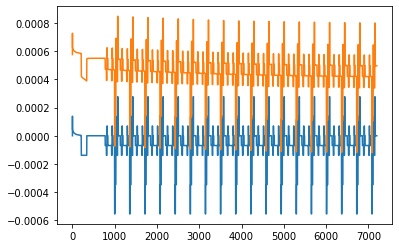

In [ ]:
Xf1 = pd.DataFrame(Xf)
print(Xf1)
plt.plot(Xf1)

**Data Normalization**

             0         1
0     0.333458  0.438045
1     0.666567  0.750795
2     0.446737  0.548427
3     0.439239  0.542033
4     0.433721  0.537293
...        ...       ...
7195  0.333433  0.273003
7196  0.333373  0.272998
7197  0.333373  0.272998
7198  0.333373  0.273090
7199  0.333313  0.272993

[7200 rows x 2 columns]


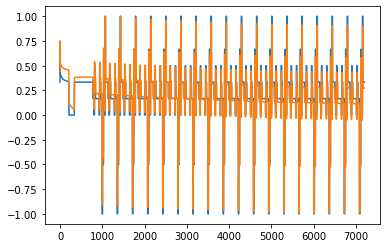

In [ ]:
df_min_max_scaled = Xf1.copy()  
# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = -1 + 2*(df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
    Xn = df_min_max_scaled.copy()
# view normalized data
print(Xn)
plt.plot(Xn)

In [ ]:
Y =df.drop(['Current(A)','Voltage(V)','Charge_Capacity(Ah)','Discharge_Capacity(Ah)','A','SOC%'], axis=1)
Y = Y.dropna()
print(Y)

               SOC
0     1.000000e+00
1     1.000000e+00
2     1.000000e+00
3     1.000000e+00
4     1.000000e+00
...            ...
7195 -1.862790e-07
7196 -2.247090e-07
7197 -2.635090e-07
7198 -3.103430e-07
7199 -3.318710e-07

[7200 rows x 1 columns]


**Dataset Splitting into Training and Testing Data**

In [ ]:
from sklearn.model_selection import train_test_split
train_Xn, test_Xn, train_Y, test_Y = train_test_split(Xn, Y,train_size=0.7,test_size=0.3)
print("Labels for training and testing data")
print(train_Y)
print(test_Y)
print(train_Xn)
print(test_Xn)

Labels for training and testing data
           SOC
2588  0.543668
6192  0.121135
1792  0.630060
4215  0.359443
2898  0.504055
...        ...
6540  0.079216
4830  0.283890
2280  0.582064
4944  0.267730
3094  0.488675

[5040 rows x 1 columns]
           SOC
846   0.750442
272   0.879823
263   0.896724
4900  0.278391
5534  0.201002
...        ...
1335  0.697061
3631  0.420049
5732  0.168019
1127  0.714071
6091  0.126013

[2160 rows x 1 columns]
             0         1
2588  0.166627  0.172949
6192  0.333373  0.280326
1792  0.333373  0.348644
4215  0.166687  0.143224
2898  0.333373  0.324897
...        ...       ...
6540  0.000120 -0.040526
4830  0.166687  0.133438
2280  0.166687  0.181209
4944 -0.499940 -0.509482
3094  0.333373  0.321280

[5040 rows x 2 columns]
             0         1
846   0.166687  0.220957
272   0.000060  0.082840
263   0.000120  0.087159
4900  0.166627  0.134360
5534  0.166687  0.126481
...        ...       ...
1335  0.166627  0.204905
3631  0.333373  0.311633
573

**Sigmoid Function**

In [ ]:
# defining the Sigmoid Function
def sigmoid (Xn):
    return 1/(1 + np.exp(-Xn))

# derivative of Sigmoid Function
def derivatives_sigmoid(Xn):
    return Xn * (1 - Xn)

**Initialization of Parameters**

In [ ]:
#Weights
w0 = 2*np.random.random((2, 3)) - 1 #for input   - 2 inputs, 1 outputs
w1 = 2*np.random.random((3, 3)) - 1 #for layer 1 - 2 inputs, 1 outputs
w2 = 2*np.random.random((3, 1)) - 1 #for layer 2 - 2 inputs, 1 outputs
#learning rate
n = 0.1
epoch = 500
hiddenlayer_neurons = 3
hiddenlayer = 2

In [ ]:
errors = []

**Feed-Forward Backpropagation**

In [ ]:
for i in range (epoch):

    #Feed forward network
    layer0 = train_Xn    #Input Layer
    layer1 = sigmoid(np.dot(layer0, w0))  #Hidden Layer 1
    layer2 = sigmoid(np.dot(layer1, w1))  #Hidden Layer 2
    layer3 = sigmoid(np.dot(layer2, w2))  #Output Layer 

    #Back propagation using gradient descent
    layer3_error = train_Y - layer3
    layer3_delta = layer3_error * derivatives_sigmoid(layer3)

    layer2_error = layer3_delta.dot (w2.T)
    layer2_delta = layer2_error * derivatives_sigmoid(layer2)

    layer1_error = layer2_delta.dot (w1.T)
    layer1_delta = layer1_error * derivatives_sigmoid(layer1)

    w2 += layer2.T.dot(layer3_delta) * n 
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n

    error = np.mean(np.abs(layer3_error))
    errors.append(error)

**Calculation of Accuracy of Training Model**

In [ ]:
accuracy_training = (1 - error) * 100

In [ ]:
print ("Training Accuracy of the model   " + str (round(accuracy_training,2)) + "%")

Training Accuracy of the model   SOC    85.98
dtype: float64%


**SOC Graph**

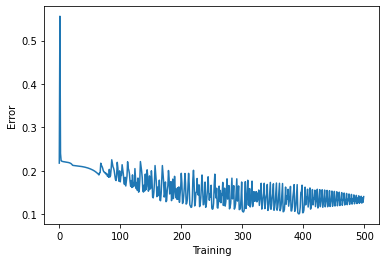

In [ ]:
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('Error')
plt.show()

**Mean Square Error Calculation**

In [ ]:
MSE = np.mean((train_Y - layer3)**2) # Mean Squared Error
print(MSE)
errors.append(MSE)

SOC    0.031164
dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(train_Y,layer3)

0.031163649383460546

**Absolute Error Calculation**

In [ ]:
print(error) # Absolute Error Value

SOC    0.140206
dtype: float64


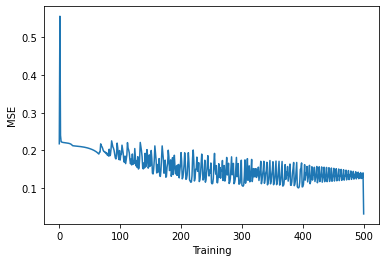

In [ ]:
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('MSE')# SOC 
plt.show()

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(train_Y,layer3)
layer2n = linear_regressor.predict(train_Y)

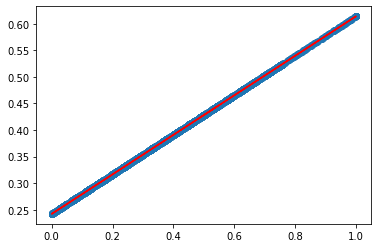

In [ ]:
plt.scatter(train_Y,layer2n)
plt.plot(train_Y, layer2n, color='red')
plt.show()

**Testing Part**

In [ ]:
#Testing
layer0t = test_Xn

layer1t = sigmoid(np.dot(layer0t, w0))
layer2t = sigmoid(np.dot(layer1t, w1))
layer3t = sigmoid(np.dot(layer2t, w2))

layer3t_error = test_Y - layer3t
error = np.mean(np.abs(layer3t_error))
errors.append(error)

**Testing Accuracy Calculation**

In [ ]:
accuracy_testing = (1 - error) * 100

In [ ]:
print ("Testing Accuracy of the model   " + str (round(accuracy_testing,2)) + "%")

Testing Accuracy of the model   SOC    87.26
dtype: float64%


**SOC error Graph**

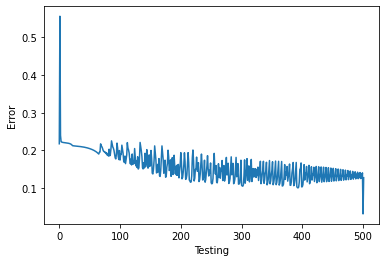

In [ ]:
plt.plot(errors)
plt.xlabel('Testing')
plt.ylabel('Error')
plt.show()

**Mean Square Error**

In [ ]:
MSE_T = np.mean((test_Y - layer3t)**2) # Mean Squared Error
print(MSE_T)
errors.append(MSE_T)

SOC    0.027763
dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_Y,layer3t)

0.02776253530641641

**Mean Absolute Error**

In [ ]:
print(error) # Absolute Error Value

SOC    0.127418
dtype: float64


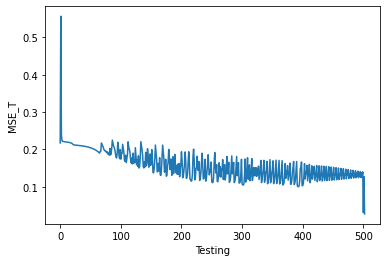

In [ ]:
plt.plot(errors)
plt.xlabel('Testing')
plt.ylabel('MSE_T')# SOC 
plt.show()